# Backward elimination

1. Creamos un modelo con TODOS los features
2. Vamos descartando paulatinamente los features que no contribuyen a nuestras predicciones

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score # r2_score es r2 ajustado -> penaliza la cantidad de features

In [5]:
df = pd.read_csv('../datasets/50_Startups.csv')

In [11]:
df.head()

R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94

In [12]:
len(set(df['State']))

3

In [13]:
df.isna().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


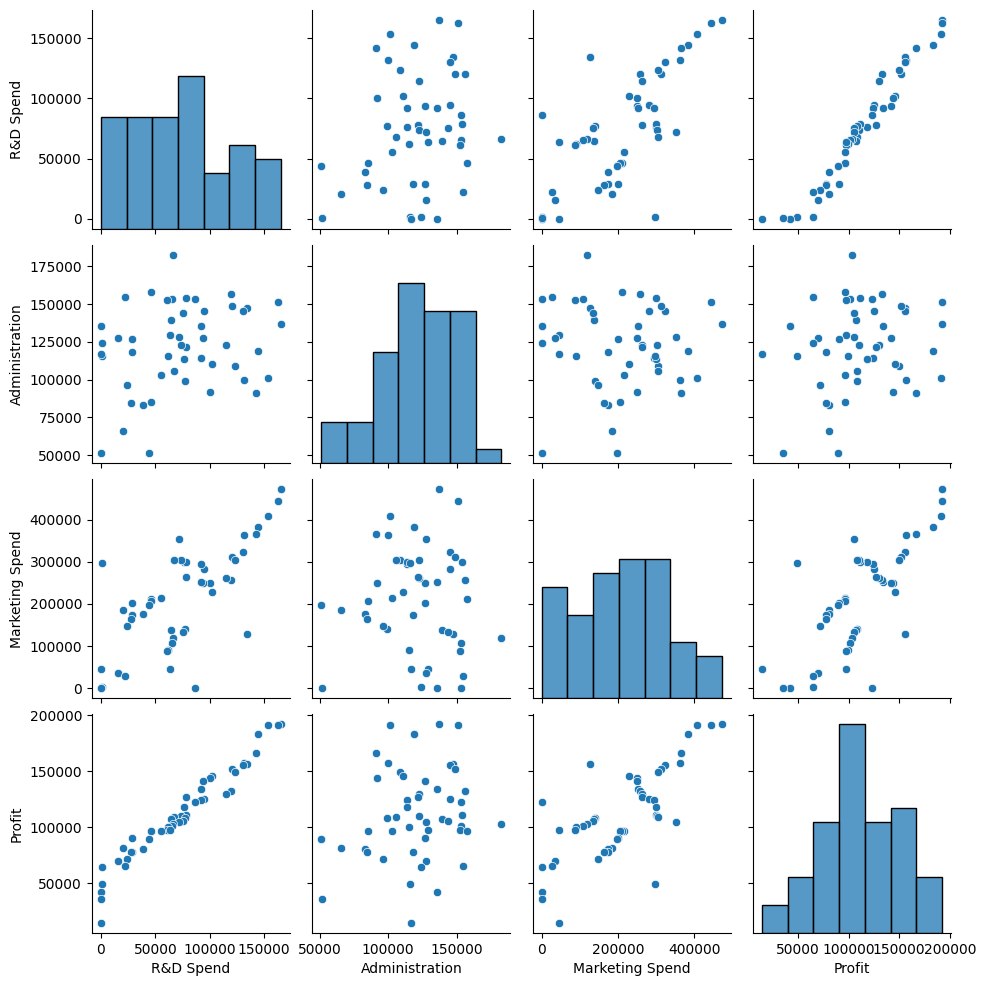

In [16]:
sns.pairplot(df)

<AxesSubplot: >

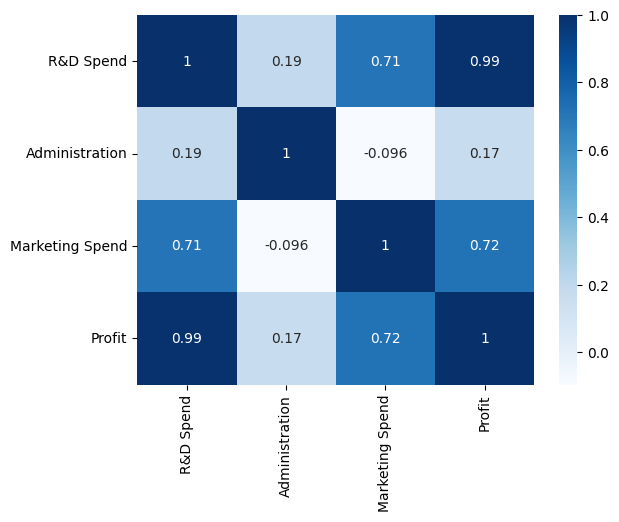

In [18]:
sns.heatmap(df.corr('spearman'), annot=True, cmap='Blues')

In [19]:
# Todos los features


In [20]:
X = df.drop(columns=['Profit'])
Y = df['Profit']

In [28]:
from sklearn.preprocessing import LabelEncoder


In [29]:
labelEncoder = LabelEncoder()

In [46]:
X['State'] = labelEncoder.fit_transform(X['State'])

In [48]:
df['State'] = labelEncoder.fit_transform(df['State'])

In [34]:
X_train, X_test, Y_train, Y_test= train_test_split(X,Y,train_size=.7, random_state=1) # random_state -> semilla de aleatoriedad

In [36]:
model = LinearRegression()

In [37]:
model.fit(X_train, Y_train)

LinearRegression()

In [38]:
y_pred = model.predict(X_test)

In [42]:
print("MSE:", mean_squared_error(y_pred,Y_test))
print("ROOT MEAN SQUARED ERROR", np.sqrt(mean_squared_error(y_pred,Y_test)))
print("R2", r2_score(y_pred,Y_test))

MSE: 73892677.13066143
ROOT MEAN SQUARED ERROR 8596.084988566681
R2 0.9417889670867441


In [44]:
print(model.coef_)

[ 7.71026662e-01 -1.41447139e-02  3.47133854e-02 -2.33476536e+02]


<AxesSubplot: >

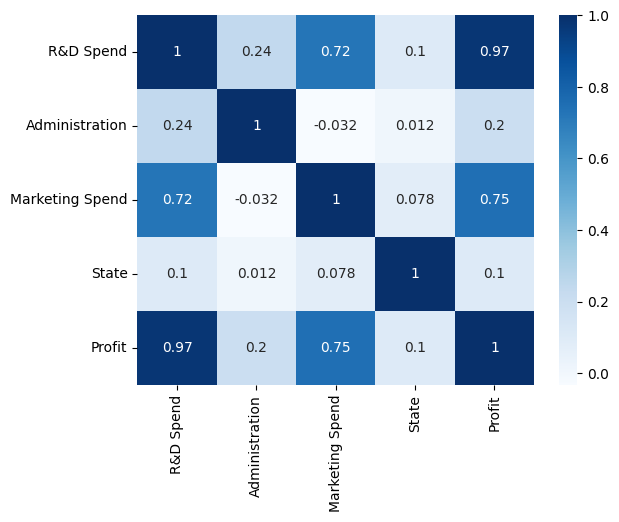

In [52]:
sns.heatmap(df.corr(), annot=True, cmap='Blues')

In [59]:
X = df.drop(columns=['Profit','State','Administration'])
y = df['Profit']

In [61]:
X.shape
y.shape

(50,)

In [54]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.3, random_state = 4)

In [55]:
model.fit(X_train,Y_train)

LinearRegression()

In [64]:
y_pred = model.predict(X_test)

In [68]:
X.sample(1)

R&D Spend  Marketing Spend
47        0.0              0.0

In [70]:
model.coef_

array([0.80925662, 0.0253358 ])

In [58]:
print("MSE:", mean_squared_error(y_pred,Y_test))
print("ROOT MEAN SQUARED ERROR", np.sqrt(mean_squared_error(y_pred,Y_test)))
print("R2", r2_score(y_pred,Y_test))

MSE: 59760070.64650726
ROOT MEAN SQUARED ERROR 7730.463805394037
R2 0.9434645656602173


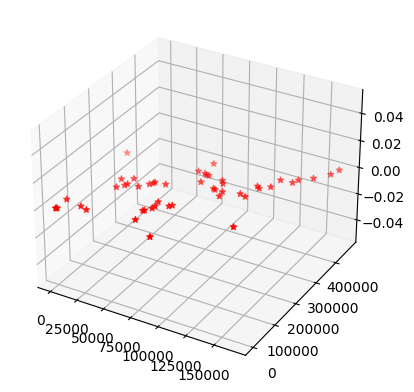

In [71]:
fig = plt.figure()
ax1 = fig.add_subplot(projection='3d')
ax1.scatter(X['R&D Spend'],X['Marketing Spend'],c='r', marker='*')

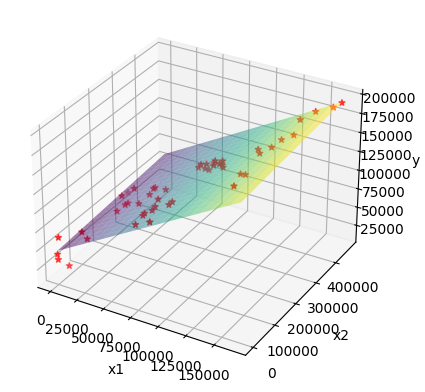

In [72]:
a = model.coef_[0]
b = model.coef_[1]
c = model.intercept_

x1_range = np.linspace(X['R&D Spend'].min(), X['R&D Spend'].max(), 20)
x2_range = np.linspace(X['Marketing Spend'].min(), X['Marketing Spend'].max(), 20)
"""
La función np.meshgrid() toma dos arrays y crea una cuadrícula de valores a partir de todas las combinaciones posibles de los dos arrays. En este caso, las cuadrículas x1_plane y x2_plane tendrán las mismas dimensiones, y cada elemento de las cuadrículas será un par de valores, uno de x1_range y otro de x2_range.

Las cuadrículas x1_plane y x2_plane se pueden utilizar para evaluar una función de dos variables en un rango de valores. Por ejemplo, el siguiente código evalúa la función z = f(x1, x2) sobre las cuadrículas x1_plane y x2_plane:
"""

x1_plane, x2_plane = np.meshgrid(x1_range, x2_range)
y_plane = a * x1_plane + b * x2_plane + c

# Crear una figura 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Graficar los datos originales
ax.scatter(X['R&D Spend'], X['Marketing Spend'], Y, c='r', marker='*', label='Datos')

# Graficar el plano de regresión
ax.plot_surface(x1_plane, x2_plane, y_plane, alpha=0.5, cmap='viridis', label='Plano de Regresión')

# Etiquetas de los ejes
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

# Mostrar el gráfico
plt.show()